# Telecom churn prediction

### Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our work is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
df=pd.read_csv('Telecom_customers.csv')
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [5]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

numbcars           49.366
dwllsize           38.308
HHstatin           37.923
ownrent            33.706
dwlltype           31.909
                    ...  
mou_peav_Mean       0.000
peak_dat_Mean       0.000
peak_vce_Mean       0.000
mouiwylisv_Mean     0.000
Customer_ID         0.000
Length: 100, dtype: float64

In [6]:
len(df)

100000

In [7]:
for i in df.columns:
    if (df[i].isnull().sum()/len(df)*100)>=30:
        df.drop(i,axis=1,inplace=True)
    else:
        continue

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 94 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [9]:
df[['avg3mou','avg6qty','avg6rev']].var()

avg3mou    284765.323513
avg6qty     33388.266690
avg6rev      1661.261614
dtype: float64

In [10]:
df.drop('Customer_ID',axis=1,inplace=True)

In [11]:
type(df['income'][0])

numpy.float64

In [12]:
x=[]
for i in df.columns:
    if df[i].nunique()<30 and type(df[i][0])==np.float64 and df[i].isnull().sum()>0:
        x.append(i)
    else:
        continue
        
print(x)

['hnd_price', 'phones', 'models', 'truck', 'rv', 'adults', 'income', 'forgntvl']


In [13]:
y=[]
for i in x:
    n=df[i].isnull().sum()
    y.append(n)

In [14]:
y

[847, 1, 1, 1732, 1732, 23019, 25436, 1732]

In [14]:
df['hnd_price'].value_counts()

149.989990    22035
29.989990     21737
129.989990    13413
199.989990    10249
79.989990      9566
59.989990      8691
99.989990      7733
9.989998       4357
39.989990       657
249.989990      244
399.989990      191
299.989990       93
179.989990       79
499.989990       63
239.989990       42
159.989990        2
119.989990        1
Name: hnd_price, dtype: int64

In [15]:
df['phones'].value_counts()

1.0     57277
2.0     24634
3.0      9677
4.0      4311
5.0      1940
6.0       907
7.0       526
8.0       298
9.0       153
10.0      107
11.0       60
12.0       37
13.0       21
14.0       13
15.0        9
16.0        9
19.0        6
17.0        4
18.0        3
24.0        2
22.0        2
21.0        1
20.0        1
28.0        1
Name: phones, dtype: int64

In [15]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,income,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,4.0,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,5.0,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,5.0,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,6.0,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,6.0,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.0,S,U,U,U,Y,U,Y,773.0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,0.0,N,U,U,Y,Y,Y,Y,835.0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,0.0,U,Y,Y,U,U,U,N,433.0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,S,U,U,U,U,U,N,75.0


## missing data

In [16]:
from sklearn.impute import SimpleImputer
smod=SimpleImputer(strategy='most_frequent')
smed=SimpleImputer(strategy='median')
smean=SimpleImputer(strategy='mean')

In [17]:
for i in df.columns:
    if type(df[i][0])==str and df[i].isnull().sum()>0:
        df[i]=smod.fit_transform(df[[i]])
    elif i in x :
        df[i]=smod.fit_transform(df[[i]])
    else:
        continue
        
    
        
                
            
    
        


In [19]:
df['avg6mou'].fillna(df['avg6mou'].median(),inplace=True)
df['avg6qty'].fillna(df['avg6qty'].median(),inplace=True)
df['avg6rev'].fillna(df['avg6rev'].median(),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 93 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [21]:
df['change_rev'].value_counts()

 0.000000     10771
-0.247500      1548
-0.270000      1192
-0.495000       718
 0.742500       530
              ...  
-67.645000        1
-14.910000        1
-19.435000        1
-59.222500        1
-1.993333         1
Name: change_rev, Length: 32537, dtype: int64

In [21]:
df['change_rev'].fillna(df['change_rev'].median(),inplace=True)
df['change_mou'].fillna(df['change_mou'].median(),inplace=True)

In [22]:
df['change_rev'].isnull().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 93 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99642 entries, 0 to 99993
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          99642 non-null  float64
 1   mou_Mean          99642 non-null  float64
 2   totmrc_Mean       99642 non-null  float64
 3   da_Mean           99642 non-null  float64
 4   ovrmou_Mean       99642 non-null  float64
 5   ovrrev_Mean       99642 non-null  float64
 6   vceovr_Mean       99642 non-null  float64
 7   datovr_Mean       99642 non-null  float64
 8   roam_Mean         99642 non-null  float64
 9   change_mou        99642 non-null  float64
 10  change_rev        99642 non-null  float64
 11  drop_vce_Mean     99642 non-null  float64
 12  drop_dat_Mean     99642 non-null  float64
 13  blck_vce_Mean     99642 non-null  float64
 14  blck_dat_Mean     99642 non-null  float64
 15  unan_vce_Mean     99642 non-null  float64
 16  unan_dat_Mean     99642 non-null  float6

In [26]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,income,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.997500,219.25,22.500,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.25,...,4.0,0.0,N,U,U,U,U,U,Y,361.0
1,57.492500,482.75,37.425,0.2475,22.750000,9.100000,9.100000,0.00,0.00,532.25,...,5.0,0.0,Z,U,U,U,U,U,Y,240.0
2,16.990000,10.25,16.990,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.25,...,5.0,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.000000,7.50,38.000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.50,...,6.0,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.230000,570.50,71.980,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.50,...,6.0,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,815.00,87.990,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.00,...,6.0,0.0,H,U,U,U,U,U,Y,230.0
99985,71.993333,724.00,70.000,0.0000,4.333333,1.083333,1.083333,0.00,0.91,-40.00,...,7.0,0.0,S,U,U,U,U,U,Y,882.0
99986,117.490000,384.00,29.990,0.0000,250.000000,87.500000,87.500000,0.00,0.00,0.00,...,2.0,0.0,S,U,U,U,U,U,Y,489.0
99990,29.990000,184.00,29.990,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-6.25,...,3.0,0.0,S,Y,U,U,U,U,Y,411.0


In [30]:
df['ethnic'][0]

'N'

In [27]:
df.corr()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avg6rev,hnd_price,phones,models,truck,rv,adults,income,forgntvl,eqpdays
rev_Mean,1.000000,0.706036,0.602151,0.403809,0.772120,0.776651,0.772162,0.152665,0.374718,0.075545,...,0.844665,0.167433,0.228117,0.225320,-0.037123,-0.011279,-0.040884,-0.030618,-0.038871,-0.213402
mou_Mean,0.706036,1.000000,0.575596,0.394582,0.575610,0.541249,0.539810,0.090349,0.125441,-0.008233,...,0.680395,0.231102,0.291907,0.286538,-0.055397,-0.028016,-0.039132,-0.071136,-0.051428,-0.315322
totmrc_Mean,0.602151,0.575596,1.000000,0.306978,0.200742,0.164411,0.163049,0.035430,0.046867,-0.020889,...,0.655793,0.223295,0.223322,0.219285,-0.036975,-0.017499,-0.043765,-0.018142,-0.035206,-0.247781
da_Mean,0.403809,0.394582,0.306978,1.000000,0.304595,0.274343,0.274160,0.040290,0.044899,-0.021569,...,0.405984,0.090847,0.168919,0.160514,-0.032881,-0.008105,-0.038224,0.028967,-0.021273,-0.120649
ovrmou_Mean,0.772120,0.575610,0.200742,0.304595,1.000000,0.956056,0.953231,0.162932,0.040370,-0.011142,...,0.637950,0.084598,0.141164,0.140901,-0.025232,-0.004582,-0.024510,-0.022622,-0.026911,-0.127763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rv,-0.011279,-0.028016,-0.017499,-0.008105,-0.004582,-0.008217,-0.008048,-0.002589,0.003323,0.006864,...,-0.016058,-0.014212,0.003333,0.008001,0.622751,1.000000,0.186260,0.076925,0.047839,0.032284
adults,-0.040884,-0.039132,-0.043765,-0.038224,-0.024510,-0.026068,-0.025933,-0.004837,-0.002408,0.000089,...,-0.045134,-0.021735,-0.000829,0.002745,0.293270,0.186260,1.000000,0.075658,0.133454,0.027587
income,-0.030618,-0.071136,-0.018142,0.028967,-0.022622,-0.029256,-0.028487,-0.011522,-0.007963,-0.007460,...,-0.030189,-0.013755,-0.041258,-0.037576,0.022791,0.076925,0.075658,1.000000,0.079757,0.088160
forgntvl,-0.038871,-0.051428,-0.035206,-0.021273,-0.026911,-0.028233,-0.028433,-0.001895,-0.005484,0.005194,...,-0.044208,-0.018613,-0.009489,-0.009844,0.042460,0.047839,0.133454,0.079757,1.000000,0.046649


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg6qty'>

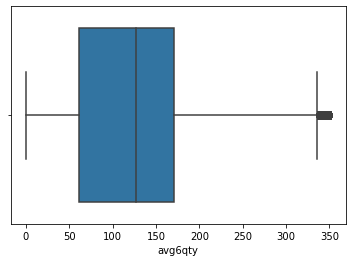

In [237]:
sn.boxplot(x='avg6qty',data=df)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income'>

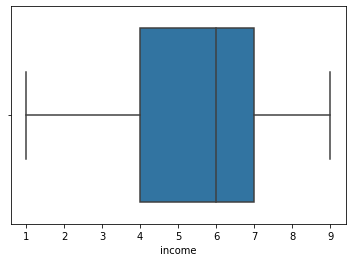

In [8]:
sn.boxplot(x='income',data=df)

<AxesSubplot:xlabel='avg3mou'>

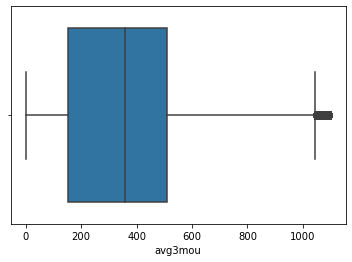

In [238]:
sn.boxplot(x='avg3mou',data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

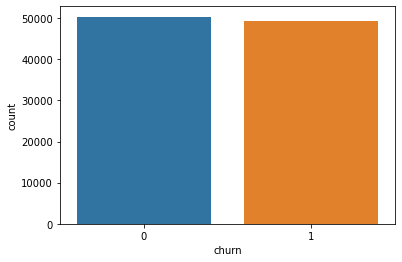

In [27]:
sn.countplot(data=df,x=df['churn'])

<AxesSubplot:xlabel='ethnic', ylabel='count'>

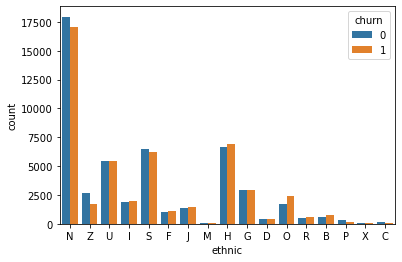

In [41]:
sn.countplot(data=df,x='ethnic',hue='churn')

## High correlation filter

In [27]:
df[['change_mou','change_rev']].corr()

,change_mou,change_rev
change_mou,1.000000,0.673922
change_rev,0.673922,1.000000


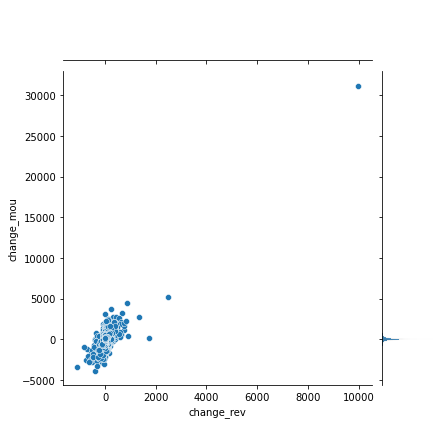

In [263]:
sn.jointplot(data=df,x='change_rev',y='change_mou')

In [28]:
df=df.drop('change_rev',axis=1)

In [264]:
df[['datovr_Mean','vceovr_Mean']].corr()

,datovr_Mean,vceovr_Mean
datovr_Mean,1.000000,0.090878
vceovr_Mean,0.090878,1.000000


In [49]:
df[['rev_Mean','totmrc_Mean']].corr()

,rev_Mean,totmrc_Mean
rev_Mean,1.000000,0.602151
totmrc_Mean,0.602151,1.000000


In [290]:
df[['ovrrev_Mean','ovrmou_Mean']].corr()

,ovrrev_Mean,ovrmou_Mean
ovrrev_Mean,1.000000,0.956056
ovrmou_Mean,0.956056,1.000000


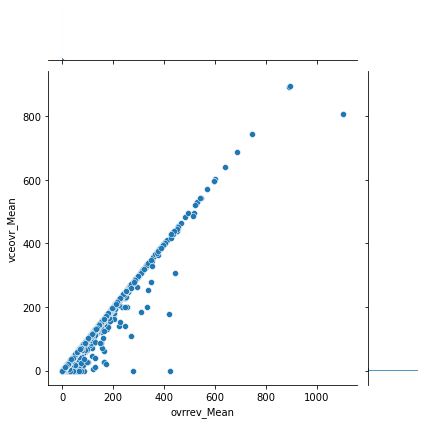

In [291]:
sn.jointplot(data=df,x='ovrrev_Mean',y='vceovr_Mean')

In [287]:
df[['ovrrev_Mean','vceovr_Mean']].corr()

,ovrrev_Mean,vceovr_Mean
ovrrev_Mean,1.000000,0.994752
vceovr_Mean,0.994752,1.000000


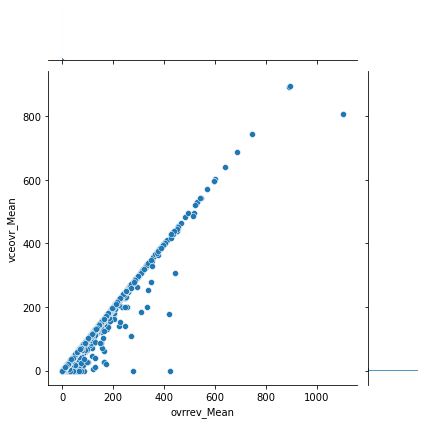

In [288]:
sn.jointplot(data=df,x='ovrrev_Mean',y='vceovr_Mean')

In [266]:
df[['rev_Mean','vceovr_Mean']].corr()

,rev_Mean,vceovr_Mean
rev_Mean,1.000000,0.772162
vceovr_Mean,0.772162,1.000000


In [48]:
df[['rev_Mean','mou_Mean']].corr()

,rev_Mean,mou_Mean
rev_Mean,1.000000,0.706036
mou_Mean,0.706036,1.000000


In [29]:
df=df.drop(['mou_Mean','vceovr_Mean'],axis=1)

In [289]:
df[['roam_Mean','datovr_Mean']].corr()

,roam_Mean,datovr_Mean
roam_Mean,1.000000,0.009684
datovr_Mean,0.009684,1.000000


In [292]:
df[['drop_vce_Mean','blck_vce_Mean']].corr()

,drop_vce_Mean,blck_vce_Mean
drop_vce_Mean,1.000000,0.195197
blck_vce_Mean,0.195197,1.000000


In [293]:
df[['drop_vce_Mean','drop_dat_Mean']].corr()

,drop_vce_Mean,drop_dat_Mean
drop_vce_Mean,1.000000,0.059456
drop_dat_Mean,0.059456,1.000000


In [296]:
df[['drop_vce_Mean','drop_blk_Mean']].corr() #strong correlation gives almost the same type of information

,drop_vce_Mean,drop_blk_Mean
drop_vce_Mean,1.000000,0.719794
drop_blk_Mean,0.719794,1.000000


In [295]:
df[['drop_blk_Mean','drop_dat_Mean']].corr()

,drop_blk_Mean,drop_dat_Mean
drop_blk_Mean,1.000000,0.110054
drop_dat_Mean,0.110054,1.000000


In [30]:
df=df.drop('drop_vce_Mean',axis=1)

In [298]:
df[['plcd_dat_Mean','comp_vce_Mean']].corr()

,plcd_dat_Mean,comp_vce_Mean
plcd_dat_Mean,1.000000,0.090545
comp_vce_Mean,0.090545,1.000000


In [31]:
df=df.drop(['plcd_dat_Mean','plcd_vce_Mean'],axis=1) #the same information is presented in other features

In [330]:
df['iwylis_vce_Mean'].value_counts()

0.000000      30221
0.333333       5682
0.666667       4670
1.000000       3271
1.333333       3048
              ...  
187.666667        1
207.666667        1
282.666667        1
344.000000        1
196.666667        1
Name: iwylis_vce_Mean, Length: 536, dtype: int64

<AxesSubplot:xlabel='iwylis_vce_Mean'>

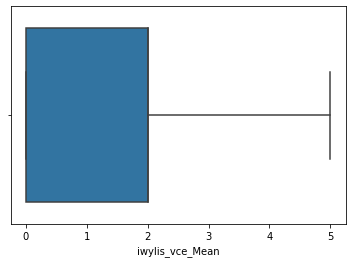

In [460]:
sn.boxplot(data=df,x='iwylis_vce_Mean')

In [336]:
df['mouiwylisv_Mean'].value_counts()

0.000000     30221
0.073333        87
0.100000        84
0.200000        83
0.166667        81
             ...  
58.940000        1
71.396667        1
22.810000        1
47.923333        1
88.060000        1
Name: mouiwylisv_Mean, Length: 21272, dtype: int64

In [32]:
df[['mouiwylisv_Mean','iwylis_vce_Mean']].corr()

,mouiwylisv_Mean,iwylis_vce_Mean
mouiwylisv_Mean,1.000000,0.785289
iwylis_vce_Mean,0.785289,1.000000


In [32]:
df=df.drop('mouiwylisv_Mean',axis=1)

In [36]:
df[['custcare_Mean','ccrndmou_Mean']].corr()  #strong correlation

,custcare_Mean,ccrndmou_Mean
custcare_Mean,1.000000,0.825105
ccrndmou_Mean,0.825105,1.000000


In [34]:
df=df.drop('ccrndmou_Mean',axis=1)

In [35]:
df=df.drop('attempt_Mean',axis=1) # same information is presented in other features

In [37]:
df.corr()

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,avg6rev,hnd_price,phones,models,truck,rv,adults,income,forgntvl,eqpdays
rev_Mean,1.000000,0.602151,0.403809,0.772120,0.776651,0.152665,0.374718,0.075545,0.056715,0.221227,...,0.844665,0.167433,0.228117,0.225320,-0.037123,-0.011279,-0.040884,-0.030618,-0.038871,-0.213402
totmrc_Mean,0.602151,1.000000,0.306978,0.200742,0.164411,0.035430,0.046867,-0.020889,0.037299,0.180360,...,0.655793,0.223295,0.223322,0.219285,-0.036975,-0.017499,-0.043765,-0.018142,-0.035206,-0.247781
da_Mean,0.403809,0.306978,1.000000,0.304595,0.274343,0.040290,0.044899,-0.021569,0.024060,0.137262,...,0.405984,0.090847,0.168919,0.160514,-0.032881,-0.008105,-0.038224,0.028967,-0.021273,-0.120649
ovrmou_Mean,0.772120,0.200742,0.304595,1.000000,0.956056,0.162932,0.040370,-0.011142,0.043038,0.182874,...,0.637950,0.084598,0.141164,0.140901,-0.025232,-0.004582,-0.024510,-0.022622,-0.026911,-0.127763
ovrrev_Mean,0.776651,0.164411,0.274343,0.956056,1.000000,0.192114,0.037407,0.003167,0.047705,0.175400,...,0.620295,0.087989,0.117436,0.118493,-0.030538,-0.008217,-0.026068,-0.029256,-0.028233,-0.135519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rv,-0.011279,-0.017499,-0.008105,-0.004582,-0.008217,-0.002589,0.003323,0.006864,-0.004791,-0.015223,...,-0.016058,-0.014212,0.003333,0.008001,0.622751,1.000000,0.186260,0.076925,0.047839,0.032284
adults,-0.040884,-0.043765,-0.038224,-0.024510,-0.026068,-0.004837,-0.002408,0.000089,-0.006871,0.007853,...,-0.045134,-0.021735,-0.000829,0.002745,0.293270,0.186260,1.000000,0.075658,0.133454,0.027587
income,-0.030618,-0.018142,0.028967,-0.022622,-0.029256,-0.011522,-0.007963,-0.007460,-0.002828,-0.045786,...,-0.030189,-0.013755,-0.041258,-0.037576,0.022791,0.076925,0.075658,1.000000,0.079757,0.088160
forgntvl,-0.038871,-0.035206,-0.021273,-0.026911,-0.028233,-0.001895,-0.005484,0.005194,-0.000396,-0.028480,...,-0.044208,-0.018613,-0.009489,-0.009844,0.042460,0.047839,0.133454,0.079757,1.000000,0.046649


### Variance filter

In [328]:
df['recv_sms_Mean'].value_counts()   #low variance which have no impact on the target class

0.000000     98772
0.333333       249
0.666667       150
1.000000        75
1.333333        57
             ...  
26.000000        1
98.333333        1
21.000000        1
15.000000        1
21.666667        1
Name: recv_sms_Mean, Length: 94, dtype: int64

In [33]:
df=df.drop('recv_sms_Mean',axis=1)

In [342]:
df['uniqsubs'].value_counts()  #low variance

1      61813
2      27407
3       6548
4       2538
5        830
6        315
7        111
8         39
9         19
10         9
11         5
12         4
13         2
18         1
196        1
Name: uniqsubs, dtype: int64

In [36]:
df=df.drop('uniqsubs',axis=1)

In [344]:
df['actvsubs'].value_counts() #low variance

1     70352
2     24258
3      3757
4       898
5       260
0        81
6        20
8         6
7         5
9         3
53        1
11        1
Name: actvsubs, dtype: int64

In [37]:
df=df.drop('actvsubs',axis=1)

In [77]:
df['cc_mou_Mean'].value_counts() # low variance

0.000000    69595
0.043333      143
0.033333      133
0.050000      117
0.040000      114
            ...  
5.070000        1
4.823333        1
7.193333        1
7.020000        1
6.463333        1
Name: cc_mou_Mean, Length: 2166, dtype: int64

In [59]:
df=df.drop('cc_mou_Mean',axis=1) # low variance

In [353]:
df['phones'].value_counts()

1.0     57101
2.0     24538
3.0      9628
4.0      4294
5.0      1933
6.0       905
7.0       522
8.0       293
9.0       152
10.0      107
11.0       60
12.0       37
13.0       21
14.0       13
15.0        9
16.0        9
19.0        6
17.0        4
18.0        3
24.0        2
22.0        2
21.0        1
20.0        1
28.0        1
Name: phones, dtype: int64

In [351]:
df['models'].value_counts()

1.0     63069
2.0     24944
3.0      7782
4.0      2463
5.0       845
6.0       330
7.0       117
8.0        50
9.0        25
10.0       11
11.0        3
15.0        1
14.0        1
16.0        1
Name: models, dtype: int64

In [350]:
df['truck'].value_counts()

0.0    81109
1.0    18533
Name: truck, dtype: int64

<AxesSubplot:xlabel='truck', ylabel='count'>

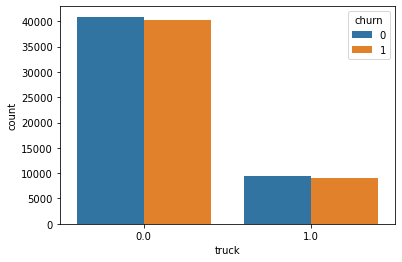

In [356]:
sn.countplot(data=df,x='truck',hue='churn')

In [2]:
df=df.drop('truck',axis=1) # based on domain knowledge useless feature

In [354]:
df['refurb_new'].value_counts()

N    85295
R    14347
Name: refurb_new, dtype: int64

<AxesSubplot:xlabel='refurb_new', ylabel='count'>

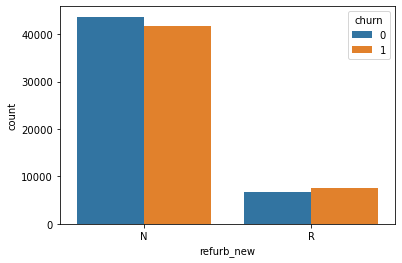

In [357]:
sn.countplot(data=df,x='refurb_new',hue='churn')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99642 entries, 0 to 99993
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          99642 non-null  float64
 1   totmrc_Mean       99642 non-null  float64
 2   da_Mean           99642 non-null  float64
 3   ovrmou_Mean       99642 non-null  float64
 4   ovrrev_Mean       99642 non-null  float64
 5   datovr_Mean       99642 non-null  float64
 6   roam_Mean         99642 non-null  float64
 7   change_mou        99642 non-null  float64
 8   drop_dat_Mean     99642 non-null  float64
 9   blck_vce_Mean     99642 non-null  float64
 10  blck_dat_Mean     99642 non-null  float64
 11  unan_vce_Mean     99642 non-null  float64
 12  unan_dat_Mean     99642 non-null  float64
 13  recv_vce_Mean     99642 non-null  float64
 14  comp_vce_Mean     99642 non-null  float64
 15  comp_dat_Mean     99642 non-null  float64
 16  custcare_Mean     99642 non-null  float6

In [45]:
df.columns.values

array(['rev_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
       'datovr_Mean', 'roam_Mean', 'change_mou', 'drop_dat_Mean',
       'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean',
       'recv_vce_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean',
       'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean',
       'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean',
       'mouowylisv_Mean', 'iwylis_vce_Mean', 'peak_vce_Mean',
       'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean',
       'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn',
       'months', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou',
       'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
       'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty',
       'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new',
       'hnd_p

In [40]:
df.describe(include=['O'])

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,marital,infobase,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642,99642
unique,3,54,2,5,19,4,2,3,5,2,17,2,2,2,2,2,2
top,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,U,M,N,U,U,U,U,U,Y
freq,66633,36494,85760,39345,11121,72083,85295,85680,38903,99418,35028,95644,94961,91596,90856,89703,68738


In [41]:
df=df.drop(['new_cell','crclscod','asl_flag','prizm_social_one','dualband','infobase','hnd_webcap'],axis=1) # based on domain knowledge useless features

In [42]:
for col in df.columns:
    if 'kid'in col:
        df=df.drop([col],axis=1)

In [43]:
df

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,phones,models,rv,marital,adults,income,forgntvl,ethnic,creditcd,eqpdays
0,23.997500,22.500,0.2475,0.000000,0.000000,0.00,0.00,-157.25,0.0,0.666667,...,2.0,2.0,0.0,S,1.0,4.0,0.0,N,Y,361.0
1,57.492500,37.425,0.2475,22.750000,9.100000,0.00,0.00,532.25,0.0,1.000000,...,7.0,6.0,1.0,S,1.0,5.0,0.0,Z,Y,240.0
2,16.990000,16.990,0.0000,0.000000,0.000000,0.00,0.00,-4.25,0.0,0.000000,...,2.0,1.0,0.0,M,2.0,5.0,0.0,N,Y,1504.0
3,38.000000,38.000,0.0000,0.000000,0.000000,0.00,0.00,-1.50,0.0,0.000000,...,1.0,1.0,0.0,M,4.0,6.0,0.0,U,Y,1812.0
4,55.230000,71.980,0.0000,0.000000,0.000000,0.00,0.00,38.50,0.0,0.666667,...,6.0,4.0,0.0,S,1.0,6.0,0.0,I,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990,0.0000,1.000000,0.390000,0.39,0.39,0.00,0.0,0.000000,...,3.0,3.0,0.0,U,2.0,6.0,0.0,H,Y,230.0
99985,71.993333,70.000,0.0000,4.333333,1.083333,0.00,0.91,-40.00,0.0,1.000000,...,1.0,1.0,0.0,U,2.0,7.0,0.0,S,Y,882.0
99986,117.490000,29.990,0.0000,250.000000,87.500000,0.00,0.00,0.00,0.0,1.000000,...,2.0,2.0,0.0,M,1.0,2.0,0.0,S,Y,489.0
99990,29.990000,29.990,0.0000,0.000000,0.000000,0.00,0.00,-6.25,0.0,0.000000,...,2.0,2.0,0.0,M,4.0,3.0,0.0,S,Y,411.0


In [44]:
areas=df['area'].value_counts().head(10).index

In [45]:
df['area']=df['area'].apply(lambda x:x if x in areas else 'other')

In [46]:
df['area'].value_counts()

other                        35002
NEW YORK CITY AREA           11121
DC/MARYLAND/VIRGINIA AREA     6555
LOS ANGELES AREA              6492
MIDWEST AREA                  6342
ATLANTIC SOUTH AREA           6125
SOUTHWEST AREA                6104
CALIFORNIA NORTH AREA         5906
NEW ENGLAND AREA              5441
DALLAS AREA                   5417
CHICAGO AREA                  5137
Name: area, dtype: int64

In [47]:
dict1={'other':0,'NEW YORK CITY AREA':1,'DC/MARYLAND/VIRGINIA AREA':2,'LOS ANGELES AREA':3,'MIDWEST AREA':4,'ATLANTIC SOUTH AREA':5,'SOUTHWEST AREA':6,'CALIFORNIA NORTH AREA':7,'NEW ENGLAND AREA':8,'DALLAS AREA':9,'CHICAGO AREA':10}

In [48]:
df['area']=df['area'].map(dict1)

In [49]:
df=df.drop('ethnic',axis=1)

In [53]:
df['marital'].value_counts()

U    38903
M    30953
S    17567
B     7096
A     5123
Name: marital, dtype: int64

In [50]:
dict2={'N':0,'R':1}

In [51]:
df['refurb_new']=df['refurb_new'].map(dict2)

In [52]:
df.drop('marital',axis=1,inplace=True) # based on domain knowledge useless feature

In [55]:
df

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,refurb_new,hnd_price,phones,models,rv,adults,income,forgntvl,creditcd,eqpdays
0,23.997500,22.500,0.2475,0.000000,0.000000,0.00,0.00,-157.25,0.0,0.666667,...,0,149.98999,2.0,2.0,0.0,1.0,4.0,0.0,1,361.0
1,57.492500,37.425,0.2475,22.750000,9.100000,0.00,0.00,532.25,0.0,1.000000,...,0,149.98999,7.0,6.0,1.0,1.0,5.0,0.0,1,240.0
2,16.990000,16.990,0.0000,0.000000,0.000000,0.00,0.00,-4.25,0.0,0.000000,...,0,29.98999,2.0,1.0,0.0,2.0,5.0,0.0,1,1504.0
3,38.000000,38.000,0.0000,0.000000,0.000000,0.00,0.00,-1.50,0.0,0.000000,...,0,29.98999,1.0,1.0,0.0,4.0,6.0,0.0,1,1812.0
4,55.230000,71.980,0.0000,0.000000,0.000000,0.00,0.00,38.50,0.0,0.666667,...,0,149.98999,6.0,4.0,0.0,1.0,6.0,0.0,1,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990,0.0000,1.000000,0.390000,0.39,0.39,0.00,0.0,0.000000,...,0,199.98999,3.0,3.0,0.0,2.0,6.0,0.0,1,230.0
99985,71.993333,70.000,0.0000,4.333333,1.083333,0.00,0.91,-40.00,0.0,1.000000,...,0,29.98999,1.0,1.0,0.0,2.0,7.0,0.0,1,882.0
99986,117.490000,29.990,0.0000,250.000000,87.500000,0.00,0.00,0.00,0.0,1.000000,...,0,59.98999,2.0,2.0,0.0,1.0,2.0,0.0,1,489.0
99990,29.990000,29.990,0.0000,0.000000,0.000000,0.00,0.00,-6.25,0.0,0.000000,...,0,29.98999,2.0,2.0,0.0,4.0,3.0,0.0,1,411.0


<AxesSubplot:xlabel='creditcd', ylabel='count'>

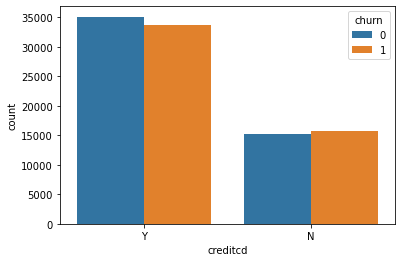

In [443]:
sn.countplot(data=df,x='creditcd',hue='churn')

In [446]:
df['creditcd'].value_counts()

Y    68738
N    30904
Name: creditcd, dtype: int64

In [53]:
dict3={'N':0,'Y':1}

In [54]:
df['creditcd']=df['creditcd'].map(dict3)

In [62]:
df.corr()

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,refurb_new,hnd_price,phones,models,rv,adults,income,forgntvl,creditcd,eqpdays
rev_Mean,1.000000,0.602151,0.403809,0.772120,0.776651,0.152665,0.374718,0.075545,0.056715,0.221227,...,0.042335,0.167433,0.228117,0.225320,-0.011279,-0.040884,-0.030618,-0.038871,-0.075706,-0.213402
totmrc_Mean,0.602151,1.000000,0.306978,0.200742,0.164411,0.035430,0.046867,-0.020889,0.037299,0.180360,...,0.026758,0.223295,0.223322,0.219285,-0.017499,-0.043765,-0.018142,-0.035206,-0.083696,-0.247781
da_Mean,0.403809,0.306978,1.000000,0.304595,0.274343,0.040290,0.044899,-0.021569,0.024060,0.137262,...,0.028078,0.090847,0.168919,0.160514,-0.008105,-0.038224,0.028967,-0.021273,-0.040103,-0.120649
ovrmou_Mean,0.772120,0.200742,0.304595,1.000000,0.956056,0.162932,0.040370,-0.011142,0.043038,0.182874,...,0.029653,0.084598,0.141164,0.140901,-0.004582,-0.024510,-0.022622,-0.026911,-0.045537,-0.127763
ovrrev_Mean,0.776651,0.164411,0.274343,0.956056,1.000000,0.192114,0.037407,0.003167,0.047705,0.175400,...,0.026170,0.087989,0.117436,0.118493,-0.008217,-0.026068,-0.029256,-0.028233,-0.051643,-0.135519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adults,-0.040884,-0.043765,-0.038224,-0.024510,-0.026068,-0.004837,-0.002408,0.000089,-0.006871,0.007853,...,0.000295,-0.021735,-0.000829,0.002745,0.186260,1.000000,0.075658,0.133454,0.279103,0.027587
income,-0.030618,-0.018142,0.028967,-0.022622,-0.029256,-0.011522,-0.007963,-0.007460,-0.002828,-0.045786,...,-0.025456,-0.013755,-0.041258,-0.037576,0.076925,0.075658,1.000000,0.079757,0.055499,0.088160
forgntvl,-0.038871,-0.035206,-0.021273,-0.026911,-0.028233,-0.001895,-0.005484,0.005194,-0.000396,-0.028480,...,-0.008556,-0.018613,-0.009489,-0.009844,0.047839,0.133454,0.079757,1.000000,0.154534,0.046649
creditcd,-0.075706,-0.083696,-0.040103,-0.045537,-0.051643,-0.015748,-0.008194,0.011204,-0.013007,-0.050716,...,-0.003663,-0.074932,-0.002070,-0.000805,0.158818,0.279103,0.055499,0.154534,1.000000,0.116240


## outliers detection

In [56]:
from datasist.structdata import detect_outliers
from datasist.structdata import get_num_feats

In [57]:
for col in df.columns:
    med=df[col].median()
    out=detect_outliers(df,0,[col])
    df.loc[out,col]=med

<AxesSubplot:xlabel='rev_Mean'>

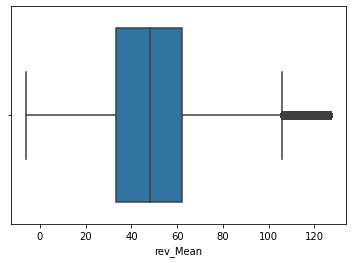

In [65]:
sn.boxplot(data=df,x='rev_Mean')

<AxesSubplot:xlabel='ovrrev_Mean'>

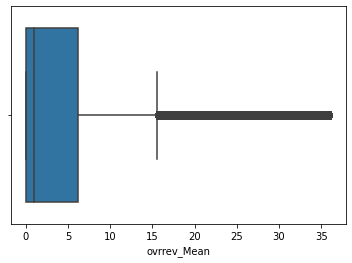

In [69]:
sn.boxplot(data=df,x='ovrrev_Mean')

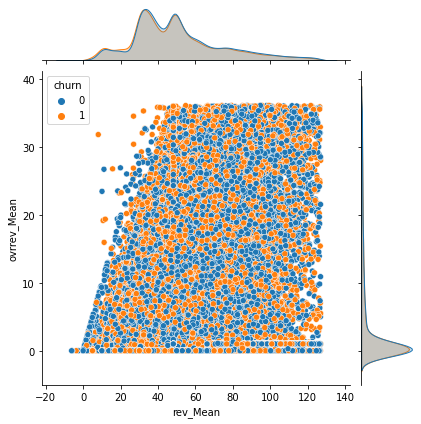

In [70]:
sn.jointplot(data=df,x='rev_Mean',y='ovrrev_Mean',hue='churn')

<AxesSubplot:xlabel='churn', ylabel='rev_Mean'>

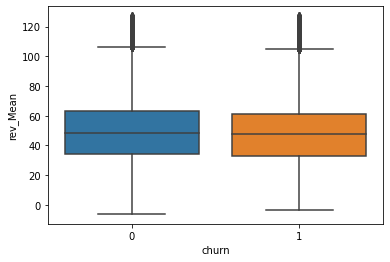

In [71]:
sn.boxplot(data=df,x='churn',y='rev_Mean')

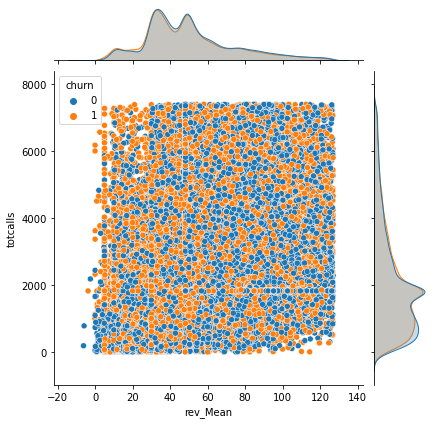

In [72]:
sn.jointplot(data=df,x='rev_Mean',y='totcalls',hue='churn')

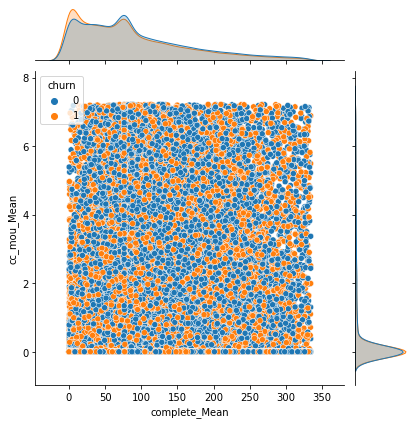

In [74]:
sn.jointplot(data=df,x='complete_Mean',y='cc_mou_Mean',hue='churn')

In [58]:
df=df.drop(['hnd_price','eqpdays','adults','forgntvl','models'],axis=1)   #according to domain knowledge useless features

In [60]:
df=df.drop('rv',axis=1) # based on domain knowledge useless feature

In [65]:
df

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,area,phones,income,creditcd
0,23.997500,22.500,0.2475,0.000000,0.000000,0.0,0.00,-157.25,0.0,0.666667,...,272,116,30,322.0,136.0,38.0,0,2.0,4.0,1
1,57.492500,37.425,0.2475,22.750000,9.100000,0.0,0.00,-6.25,0.0,1.000000,...,305,158,40,477.0,275.0,48.0,10,1.0,5.0,1
2,16.990000,16.990,0.0000,0.000000,0.000000,0.0,0.00,-4.25,0.0,0.000000,...,12,7,17,11.0,6.0,17.0,0,2.0,5.0,1
3,38.000000,38.000,0.0000,0.000000,0.000000,0.0,0.00,-1.50,0.0,0.000000,...,8,3,38,50.0,25.0,40.0,10,1.0,6.0,1
4,55.230000,71.980,0.0000,0.000000,0.000000,0.0,0.00,38.50,0.0,0.666667,...,558,191,55,586.0,196.0,80.0,8,1.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990,0.0000,1.000000,0.390000,0.0,0.39,0.00,0.0,0.000000,...,482,106,93,536.0,93.0,96.0,3,3.0,6.0,1
99985,71.993333,70.000,0.0000,4.333333,1.083333,0.0,0.00,-40.00,0.0,1.000000,...,715,291,73,707.0,262.0,74.0,3,1.0,7.0,1
99986,117.490000,29.990,0.0000,2.750000,1.000000,0.0,0.00,0.00,0.0,1.000000,...,128,99,35,135.0,106.0,34.0,3,2.0,2.0,1
99990,29.990000,29.990,0.0000,0.000000,0.000000,0.0,0.00,-6.25,0.0,0.000000,...,123,26,32,128.0,26.0,37.0,3,2.0,3.0,1


In [64]:
df.columns

Index(['rev_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
       'datovr_Mean', 'roam_Mean', 'change_mou', 'drop_dat_Mean',
       'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean',
       'recv_vce_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean',
       'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean',
       'mou_opkd_Mean', 'drop_blk_Mean', 'complete_Mean', 'callfwdv_Mean',
       'callwait_Mean', 'churn', 'months', 'totcalls', 'totmou', 'totrev',
       'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou',
       'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'area', 'phones',
       'income', 'creditcd'],
      dtype='object')

In [66]:
df=pd.get_dummies(df,columns=['creditcd','area'],drop_first=True)

In [63]:
df=df.drop('refurb_new',axis=1)  # based on domain knowledge useless feature

In [67]:
x=df.drop('churn',axis=1)

In [68]:
x

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,area_10
0,23.997500,22.500,0.2475,0.000000,0.000000,0.0,0.00,-157.25,0.0,0.666667,...,0,0,0,0,0,0,0,0,0,0
1,57.492500,37.425,0.2475,22.750000,9.100000,0.0,0.00,-6.25,0.0,1.000000,...,0,0,0,0,0,0,0,0,0,1
2,16.990000,16.990,0.0000,0.000000,0.000000,0.0,0.00,-4.25,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,38.000000,38.000,0.0000,0.000000,0.000000,0.0,0.00,-1.50,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,55.230000,71.980,0.0000,0.000000,0.000000,0.0,0.00,38.50,0.0,0.666667,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990,0.0000,1.000000,0.390000,0.0,0.39,0.00,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
99985,71.993333,70.000,0.0000,4.333333,1.083333,0.0,0.00,-40.00,0.0,1.000000,...,0,0,1,0,0,0,0,0,0,0
99986,117.490000,29.990,0.0000,2.750000,1.000000,0.0,0.00,0.00,0.0,1.000000,...,0,0,1,0,0,0,0,0,0,0
99990,29.990000,29.990,0.0000,0.000000,0.000000,0.0,0.00,-6.25,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [69]:
y=df['churn']

In [70]:
y

0        1
1        0
2        1
3        0
4        0
        ..
99984    1
99985    0
99986    1
99990    1
99993    0
Name: churn, Length: 99642, dtype: int64

In [71]:
x.columns

Index(['rev_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
       'datovr_Mean', 'roam_Mean', 'change_mou', 'drop_dat_Mean',
       'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean',
       'recv_vce_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean',
       'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean',
       'mou_opkd_Mean', 'drop_blk_Mean', 'complete_Mean', 'callfwdv_Mean',
       'callwait_Mean', 'months', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'phones', 'income',
       'creditcd_1', 'area_1', 'area_2', 'area_3', 'area_4', 'area_5',
       'area_6', 'area_7', 'area_8', 'area_9', 'ar

In [72]:
x.shape

(99642, 66)

In [ ]:
dict1={'other':0,'NEW YORK CITY AREA':1,'DC/MARYLAND/VIRGINIA AREA':2,'LOS ANGELES AREA':3,'MIDWEST AREA':4,'ATLANTIC SOUTH AREA':5,'SOUTHWEST AREA':6,'CALIFORNIA NORTH AREA':7,'NEW ENGLAND AREA':8,'DALLAS AREA':9,'CHICAGO AREA':10}

In [82]:
df.columns

Index(['rev_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
       'datovr_Mean', 'roam_Mean', 'change_mou', 'drop_dat_Mean',
       'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean',
       'recv_vce_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean',
       'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean',
       'mou_opkd_Mean', 'drop_blk_Mean', 'complete_Mean', 'callfwdv_Mean',
       'callwait_Mean', 'churn', 'months', 'totcalls', 'totmou', 'totrev',
       'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou',
       'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'phones',
       'income', 'creditcd_1', 'area_1', 'area_2', 'area_3', 'area_4',
       'area_5', 'area_6', 'area_7', 'area_8', 'are

## scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [74]:
scaler.fit(x)
x_scaled=scaler.transform(x)

In [75]:
x_scaled

array([[-1.0792754 , -1.11626078, -0.18931676, ..., -0.240332  ,
        -0.23977083, -0.23314569],
       [ 0.29150321, -0.36101044, -0.18931676, ..., -0.240332  ,
        -0.23977083,  4.28916359],
       [-1.36605645, -1.39508352, -0.66492523, ..., -0.240332  ,
        -0.23977083, -0.23314569],
       ...,
       [ 2.74689326, -0.73724403, -0.66492523, ..., -0.240332  ,
        -0.23977083, -0.23314569],
       [-0.8340331 , -0.73724403, -0.66492523, ..., -0.240332  ,
        -0.23977083, -0.23314569],
       [ 1.8334501 ,  2.04592307,  1.23750866, ..., -0.240332  ,
        -0.23977083, -0.23314569]])

## PCA

In [76]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20,random_state=20)

In [77]:
x_new=pca.fit_transform(x_scaled)

In [78]:
x_new

array([[-2.50804967,  1.27355267,  1.3027519 , ..., -1.46395164,
        -0.10068036, -0.90408465],
       [ 2.5806835 , -2.4717374 ,  1.12939569, ..., -0.45248046,
        -0.70238508, -0.57263976],
       [-4.33100951,  3.26401181,  1.69289504, ..., -0.01640033,
        -0.24391489, -0.51102678],
       ...,
       [-1.19434411,  1.06153563,  0.64972949, ..., -0.96514282,
         0.02630117, -1.76369214],
       [-4.29822043,  0.6704453 ,  0.78442562, ...,  0.27251599,
         1.14012668, -1.3842305 ],
       [ 7.58622372,  3.2880112 , -1.33668749, ...,  1.52340559,
         0.64892671,  0.2665918 ]])

In [79]:
x_new=pd.DataFrame(x_new,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20'])

## Undersampling

In [80]:
from imblearn.under_sampling import RandomUnderSampler
und=RandomUnderSampler()

In [81]:
y.value_counts() 

0    50325
1    49317
Name: churn, dtype: int64

In [82]:
x_new,y=und.fit_resample(x_new,y)

In [84]:
x_new.shape

(98634, 20)

In [85]:
x_new

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,-0.440194,-1.978304,-0.963823,0.320932,1.041411,-0.017409,-1.286434,1.130859,-0.400272,-0.015405,1.651687,0.517812,1.014607,-0.116800,-2.143961,3.263828,-0.508918,0.074859,-0.048993,0.634057
1,4.713598,-3.003148,0.171896,2.551717,-1.082964,2.162434,1.991682,0.549945,0.443498,0.593359,1.027075,0.097167,-0.743699,2.276418,0.964074,-0.661623,-0.267708,0.390753,0.032478,0.998464
2,-2.165653,-0.910254,-0.095109,-0.402753,-1.157457,2.042648,0.785324,0.738029,1.732419,0.169363,0.634765,0.782456,-0.039840,2.578941,2.361030,0.564877,0.539684,-0.282519,1.813038,0.409238
3,4.252553,-0.682359,-2.214269,0.832599,-1.752800,-0.423307,0.505544,-0.475665,0.324856,0.804853,-0.345448,0.037308,0.091143,-0.062164,0.116960,0.234978,0.162179,-0.670058,-0.559380,0.880958
4,-4.518209,0.252113,-0.420651,0.646844,0.133043,-0.119174,0.040643,0.304019,-0.436315,-0.265041,0.058290,-0.248988,-0.127916,-0.044357,-0.106859,-0.571930,-0.198148,0.229778,-0.048716,0.465019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98629,1.540469,-1.089130,2.449455,1.686947,-1.592411,-0.303248,-1.397712,0.257547,-1.591748,3.052334,-0.676135,0.005177,-0.184815,-0.077180,-0.242322,-0.354132,-0.303394,-0.205296,1.153653,0.349748
98630,-4.256485,2.119387,0.556429,0.103127,-0.544909,-0.889651,-0.726969,0.789467,-1.606466,2.775203,-0.911864,0.068439,-0.385834,-0.035009,-0.300249,-0.623457,0.303315,0.425140,1.369819,-0.264419
98631,1.836972,2.554099,-1.895974,-0.498041,-2.568349,-1.513130,-0.528293,0.983658,-0.871213,1.931288,-0.660589,0.629643,0.100761,0.227897,0.595357,0.106872,1.046439,0.361852,3.867693,-2.610389
98632,-1.194344,1.061536,0.649729,0.488977,-0.858876,-1.190251,-0.227416,1.670752,-1.788280,3.170142,-1.672846,0.476454,0.085183,0.178165,0.441693,-0.676754,0.656210,-0.965143,0.026301,-1.763692


In [ ]:
sn.pairplot(data=df2,hue='churn')

In [83]:
y.value_counts()

0    49317
1    49317
Name: churn, dtype: int64

In [94]:
df2=pd.concat([x_new,y],axis=1)
df2

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,churn
0,1.802828,0.007708,-1.081435,-1.844931,1.640044,-0.459069,-1.063593,0.642754,1.099047,0.251788,...,0.263688,0.153889,0.276550,0.685989,0.285234,-0.744328,-1.444349,-0.976074,0.498962,0
1,0.093353,0.077130,1.059252,-0.140598,-0.930697,0.099956,0.238795,1.063489,-0.678417,-0.182086,...,-0.054774,-0.111473,0.074424,0.156698,-0.452478,0.568960,-0.493683,-0.388221,0.214018,0
2,-3.534387,0.981898,0.504492,0.510792,-1.258663,2.105164,0.575258,-0.264613,-0.247689,0.387042,...,-0.030979,0.114601,0.017498,-0.079193,0.427203,0.868551,-0.417381,-0.990792,0.082352,0
3,3.497463,4.070291,2.200887,-0.599986,1.415669,-0.309701,-0.960517,0.530639,1.026705,-1.988406,...,0.825810,0.932708,0.782202,2.350073,0.748376,1.449558,-0.270830,3.215698,-1.692636,0
4,5.933156,-3.685597,0.748505,-1.859937,0.081403,-0.804414,0.062602,-0.255491,-1.030912,0.598142,...,0.133440,0.162796,0.044973,0.124130,-0.152540,2.330909,-0.542332,-0.238305,0.794901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98629,1.540469,-1.089130,2.449455,1.686947,-1.592411,-0.303248,-1.397712,0.257547,-1.591748,3.052334,...,0.005177,-0.184815,-0.077180,-0.242322,-0.354132,-0.303394,-0.205296,1.153653,0.349748,1
98630,-4.256485,2.119387,0.556429,0.103127,-0.544909,-0.889651,-0.726969,0.789467,-1.606466,2.775203,...,0.068439,-0.385834,-0.035009,-0.300249,-0.623457,0.303315,0.425140,1.369819,-0.264419,1
98631,1.836972,2.554099,-1.895974,-0.498041,-2.568349,-1.513130,-0.528293,0.983658,-0.871213,1.931288,...,0.629643,0.100761,0.227897,0.595357,0.106872,1.046439,0.361852,3.867693,-2.610389,1
98632,-1.194344,1.061536,0.649729,0.488977,-0.858876,-1.190251,-0.227416,1.670752,-1.788280,3.170142,...,0.476454,0.085183,0.178165,0.441693,-0.676754,0.656210,-0.965143,0.026301,-1.763692,1


In [95]:
df2=df2.dropna(axis=0)

In [96]:
df2

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,churn
0,1.802828,0.007708,-1.081435,-1.844931,1.640044,-0.459069,-1.063593,0.642754,1.099047,0.251788,...,0.263688,0.153889,0.276550,0.685989,0.285234,-0.744328,-1.444349,-0.976074,0.498962,0
1,0.093353,0.077130,1.059252,-0.140598,-0.930697,0.099956,0.238795,1.063489,-0.678417,-0.182086,...,-0.054774,-0.111473,0.074424,0.156698,-0.452478,0.568960,-0.493683,-0.388221,0.214018,0
2,-3.534387,0.981898,0.504492,0.510792,-1.258663,2.105164,0.575258,-0.264613,-0.247689,0.387042,...,-0.030979,0.114601,0.017498,-0.079193,0.427203,0.868551,-0.417381,-0.990792,0.082352,0
3,3.497463,4.070291,2.200887,-0.599986,1.415669,-0.309701,-0.960517,0.530639,1.026705,-1.988406,...,0.825810,0.932708,0.782202,2.350073,0.748376,1.449558,-0.270830,3.215698,-1.692636,0
4,5.933156,-3.685597,0.748505,-1.859937,0.081403,-0.804414,0.062602,-0.255491,-1.030912,0.598142,...,0.133440,0.162796,0.044973,0.124130,-0.152540,2.330909,-0.542332,-0.238305,0.794901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98629,1.540469,-1.089130,2.449455,1.686947,-1.592411,-0.303248,-1.397712,0.257547,-1.591748,3.052334,...,0.005177,-0.184815,-0.077180,-0.242322,-0.354132,-0.303394,-0.205296,1.153653,0.349748,1
98630,-4.256485,2.119387,0.556429,0.103127,-0.544909,-0.889651,-0.726969,0.789467,-1.606466,2.775203,...,0.068439,-0.385834,-0.035009,-0.300249,-0.623457,0.303315,0.425140,1.369819,-0.264419,1
98631,1.836972,2.554099,-1.895974,-0.498041,-2.568349,-1.513130,-0.528293,0.983658,-0.871213,1.931288,...,0.629643,0.100761,0.227897,0.595357,0.106872,1.046439,0.361852,3.867693,-2.610389,1
98632,-1.194344,1.061536,0.649729,0.488977,-0.858876,-1.190251,-0.227416,1.670752,-1.788280,3.170142,...,0.476454,0.085183,0.178165,0.441693,-0.676754,0.656210,-0.965143,0.026301,-1.763692,1


In [97]:
y=df['churn']

In [98]:
y

0        1
1        0
2        1
3        0
4        0
        ..
99984    1
99985    0
99986    1
99990    1
99993    0
Name: churn, Length: 99642, dtype: int64

In [99]:
x_scaled,y=und.fit_resample(x_scaled,y)

In [100]:
x_scaled.shape

(98634, 66)

In [101]:
y.value_counts()

0    49317
1    49317
Name: churn, dtype: int64

## ML

In [86]:
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,stratify=y)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV,cross_validate,cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [104]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import  SelectFromModel

## tree classifier

In [105]:
from sklearn.tree import ExtraTreeClassifier
tree=ExtraTreeClassifier(random_state=2)

In [130]:
params={'criterion':['gini','entropy']}

In [186]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(tree,param_distributions=params,cv=10,n_iter=2,return_train_score=True)

In [202]:
rscv.fit(x_scaled,y)

RandomizedSearchCV(cv=10, estimator=ExtraTreeClassifier(random_state=2),
                   n_iter=2,
                   param_distributions={'criterion': ['gini', 'entropy']},
                   return_train_score=True)

In [206]:
rscv.best_estimator_

ExtraTreeClassifier(random_state=2)

In [205]:
rscv.best_params_

{'criterion': 'gini'}

In [207]:
rscv.cv_results_

{'mean_fit_time': array([0.33647292, 0.3204309 ]),
 'std_fit_time': array([0.05735916, 0.03071952]),
 'mean_score_time': array([0.01193285, 0.0062768 ]),
 'std_score_time': array([0.01819936, 0.00768786]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.43025142, 0.42680454]),
 'split1_test_score': array([0.4871249, 0.4985807]),
 'split2_test_score': array([0.50577859, 0.4985807 ]),
 'split3_test_score': array([0.5061841 , 0.51439578]),
 'split4_test_score': array([0.52458684, 0.50806043]),
 'split5_test_score': array([0.51323127, 0.51414377]),
 'split6_test_score': array([0.52367434, 0.51931461]),
 'split7_test_score': array([0.47703538, 0.47561594]),
 'split8_test_score': array([0.49224374, 0.49092568]),
 'split9_test_score': array([0.46324648, 0.4592923 ]),
 'mean_test_score': array([0.49233571,

In [209]:
rscv.best_score_

0.4923357057790678

In [210]:
rfe2=RFE(tree,n_features_to_select=30)  # a feature selection method which can increase accuracy and optimize the efficacy of model

In [212]:
rfe2.fit(x_scaled,y)

RFE(estimator=ExtraTreeClassifier(random_state=2), n_features_to_select=30)

In [213]:
rfe2.support_

array([ True,  True, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [215]:
x.columns[rfe2.support_]

Index(['rev_Mean', 'totmrc_Mean', 'change_mou', 'blck_vce_Mean',
       'unan_vce_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean',
       'mouowylisv_Mean', 'peak_vce_Mean', 'mou_peav_Mean', 'mou_opkv_Mean',
       'drop_blk_Mean', 'months', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'income'],
      dtype='object')

In [216]:
x_rfe2=df[['rev_Mean', 'totmrc_Mean', 'change_mou', 'blck_vce_Mean',
       'unan_vce_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean',
       'mouowylisv_Mean', 'peak_vce_Mean', 'mou_peav_Mean', 'mou_opkv_Mean',
       'drop_blk_Mean', 'months', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'income']]

In [217]:
x_rfe2

,rev_Mean,totmrc_Mean,change_mou,blck_vce_Mean,unan_vce_Mean,inonemin_Mean,mou_cvce_Mean,mou_rvce_Mean,mouowylisv_Mean,peak_vce_Mean,...,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,income
0,23.997500,22.500,-157.25,0.666667,6.333333,18.000000,90.643333,97.176667,0.000000,58.000000,...,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,4.0
1,57.492500,37.425,-6.25,1.000000,61.333333,53.000000,189.396667,55.280000,24.216667,83.666667,...,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,5.0
2,16.990000,16.990,-4.25,0.000000,2.666667,0.333333,5.426667,0.000000,0.000000,5.000000,...,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,5.0
3,38.000000,38.000,-1.50,0.000000,0.000000,1.333333,8.410000,0.413333,0.256667,1.333333,...,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,6.0
4,55.230000,71.980,38.50,0.666667,77.000000,66.000000,285.233333,106.330000,10.816667,97.333333,...,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990,0.00,0.000000,15.333333,39.666667,328.370000,140.973333,8.563333,72.000000,...,70.53,339.86,73.76,482,106,93,536.0,93.0,96.0,6.0
99985,71.993333,70.000,-40.00,1.000000,23.333333,50.333333,449.493333,70.236667,32.036667,262.000000,...,77.68,636.00,233.70,715,291,73,707.0,262.0,74.0,7.0
99986,117.490000,29.990,0.00,1.000000,27.000000,24.666667,81.763333,21.703333,0.693333,99.333333,...,42.98,160.62,126.81,128,99,35,135.0,106.0,34.0,2.0
99990,29.990000,29.990,-6.25,0.000000,14.000000,1.000000,124.880000,16.636667,5.266667,18.333333,...,34.18,104.82,27.18,123,26,32,128.0,26.0,37.0,3.0


In [218]:
x_rfe2=scaler.fit_transform(x_rfe2)

In [220]:
df

,rev_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,datovr_Mean,roam_Mean,change_mou,drop_dat_Mean,blck_vce_Mean,...,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,area_10
0,23.997500,22.500,0.2475,0.000000,0.000000,0.0,0.00,-157.25,0.0,0.666667,...,0,0,0,0,0,0,0,0,0,0
1,57.492500,37.425,0.2475,22.750000,9.100000,0.0,0.00,-6.25,0.0,1.000000,...,0,0,0,0,0,0,0,0,0,1
2,16.990000,16.990,0.0000,0.000000,0.000000,0.0,0.00,-4.25,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,38.000000,38.000,0.0000,0.000000,0.000000,0.0,0.00,-1.50,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,55.230000,71.980,0.0000,0.000000,0.000000,0.0,0.00,38.50,0.0,0.666667,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,87.990,0.0000,1.000000,0.390000,0.0,0.39,0.00,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0
99985,71.993333,70.000,0.0000,4.333333,1.083333,0.0,0.00,-40.00,0.0,1.000000,...,0,0,1,0,0,0,0,0,0,0
99986,117.490000,29.990,0.0000,2.750000,1.000000,0.0,0.00,0.00,0.0,1.000000,...,0,0,1,0,0,0,0,0,0,0
99990,29.990000,29.990,0.0000,0.000000,0.000000,0.0,0.00,-6.25,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [221]:
x=df.drop('churn',axis=1)
y=df['churn']

In [222]:
x_rfe2,y=und.fit_resample(x_rfe2,y)

In [223]:
tree_cv=cross_validate(tree,x_rfe2,y,cv=10,scoring='accuracy',n_jobs=-1,return_train_score=True)

In [224]:
tree_cv

{'fit_time': array([0.593611  , 0.60923338, 0.6248498 , 0.6248498 , 0.54674506,
        0.51549935, 0.59360957, 0.49988151, 0.32804632, 0.39052916]),
 'score_time': array([0.        , 0.06248474, 0.        , 0.01562333, 0.01562285,
        0.01562285, 0.01562333, 0.03124142, 0.01561904, 0.        ]),
 'test_score': array([0.41504461, 0.47303325, 0.49168694, 0.50375101, 0.5120146 ,
        0.52347156, 0.51870628, 0.49122985, 0.49518402, 0.48007706]),
 'train_score': array([0.99998873, 1.        , 0.99998873, 0.99998873, 0.99998874,
        1.        , 0.99998874, 0.99998874, 0.99998874, 0.99998874])}

In [225]:
tree_cv['test_score'].mean()

0.4904199177145383

In [227]:
x_rfe=RFE(tree,n_features_to_select=12)

In [235]:
x_rfe.fit(x_new,y)

RFE(estimator=ExtraTreeClassifier(random_state=2), n_features_to_select=12)

In [236]:
x_rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True])

In [240]:
x_new.columns[x_rfe.support_]

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc7', 'pc8', 'pc10', 'pc11', 'pc17',
       'pc18', 'pc20'],
      dtype='object')

In [241]:
x_rfe=x_new[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc7', 'pc8', 'pc10', 'pc11', 'pc17',
       'pc18', 'pc20']]

In [242]:
x_rfe

,pc1,pc2,pc3,pc4,pc5,pc7,pc8,pc10,pc11,pc17,pc18,pc20
0,-4.430303,-1.511611,-0.538575,-0.697062,-0.122208,0.121930,-0.816350,-0.692156,-0.452249,0.529524,0.240457,-1.028451
1,-0.034674,-1.277869,-0.393990,2.367011,0.075546,-0.136879,0.376931,-0.509062,-0.291176,0.627977,1.230546,1.361406
2,0.925747,0.909471,1.501190,-0.840618,0.623953,0.065045,0.038848,0.192553,0.519455,0.007031,-0.203072,-0.722008
3,2.354455,-0.545357,-0.582062,-1.321491,0.230977,0.802746,0.821718,1.065950,0.884987,1.235962,-0.110507,2.348662
4,1.683708,0.734375,-0.066708,0.351069,-2.352106,2.168270,-0.766899,-1.387189,-0.443903,-0.802369,-0.500581,0.125633
...,...,...,...,...,...,...,...,...,...,...,...,...
98629,1.540469,-1.089130,2.449455,1.686947,-1.592411,-1.397712,0.257547,3.052334,-0.676135,-0.303394,-0.205296,0.349748
98630,-4.256485,2.119387,0.556429,0.103127,-0.544909,-0.726969,0.789467,2.775203,-0.911864,0.303315,0.425140,-0.264419
98631,1.836972,2.554099,-1.895974,-0.498041,-2.568349,-0.528293,0.983658,1.931288,-0.660589,1.046439,0.361852,-2.610389
98632,-1.194344,1.061536,0.649729,0.488977,-0.858876,-0.227416,1.670752,3.170142,-1.672846,0.656210,-0.965143,-1.763692


In [245]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [246]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

In [247]:
tree_cv2=cross_validate(tree,x_rfe,y,cv=cv,scoring='accuracy',n_jobs=-1,return_train_score=True)

In [248]:
tree_cv2 # overfitting....

{'fit_time': array([0.3905375 , 0.37491322, 0.42177939, 0.37491226, 0.37490916,
        0.35939765, 0.34976482, 0.38654327, 0.41537142, 0.40871143,
        0.40904188, 0.37491298, 0.42041636, 0.40665674, 0.37541175,
        0.4066546 , 0.4217782 , 0.39052916, 0.37490821, 0.3749156 ,
        0.34366727, 0.35929179, 0.34366536, 0.35928965, 0.42177653,
        0.37490821, 0.37491488, 0.39053059, 0.281178  , 0.26556349]),
 'score_time': array([0.01561809, 0.01562142, 0.        , 0.01562381, 0.01673222,
        0.01396751, 0.01104498, 0.01495862, 0.01561928, 0.01562548,
        0.01561546, 0.        , 0.00184989, 0.01562166, 0.01562691,
        0.01562285, 0.01561928, 0.        , 0.01562357, 0.        ,
        0.01562309, 0.        , 0.01562047, 0.01562071, 0.01561952,
        0.01562381, 0.01562572, 0.01561999, 0.        , 0.0156343 ]),
 'test_score': array([0.5142944 , 0.51855231, 0.51388889, 0.51976886, 0.51100071,
        0.51211599, 0.51231877, 0.51454933, 0.51951739, 0.51688127,
    

In [249]:
tree_cv2['test_score'].mean()

0.5137275226565011

## SV classifier

In [121]:
from sklearn.svm import SVC

In [251]:
svc=SVC(random_state=20)

In [99]:
svc_cv=cross_validate(svc,x_new,y,cv=5,scoring='accuracy',n_jobs=-1)

In [490]:
svc_cv

{'fit_time': array([785.66726828, 788.46664786, 799.99610734, 813.97768044,
        444.05312037]),
 'score_time': array([395.76112843, 391.05530715, 390.84661603, 388.01255155,
        180.89238191]),
 'test_score': array([0.56776557, 0.54739325, 0.54039542, 0.56804496, 0.55560016])}

In [491]:
svc_cv['test_score'].mean()

0.5558398719508852

In [107]:
x_new

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,1.802828,0.007708,-1.081435,-1.844931,1.640044,-0.459069,-1.063593,0.642754,1.099047,0.251788,-1.037250,0.263688,0.153889,0.276550,0.685989,0.285234,-0.744328,-1.444349,-0.976074,0.498962
1,0.093353,0.077130,1.059252,-0.140598,-0.930697,0.099956,0.238795,1.063489,-0.678417,-0.182086,-0.490861,-0.054774,-0.111473,0.074424,0.156698,-0.452478,0.568960,-0.493683,-0.388221,0.214018
2,-3.534387,0.981898,0.504492,0.510792,-1.258663,2.105164,0.575258,-0.264613,-0.247689,0.387042,-0.595790,-0.030979,0.114601,0.017498,-0.079193,0.427203,0.868551,-0.417381,-0.990792,0.082352
3,3.497463,4.070291,2.200887,-0.599986,1.415669,-0.309701,-0.960517,0.530639,1.026705,-1.988406,-0.631794,0.825810,0.932708,0.782202,2.350073,0.748376,1.449558,-0.270830,3.215698,-1.692636
4,5.933156,-3.685597,0.748505,-1.859937,0.081403,-0.804414,0.062602,-0.255491,-1.030912,0.598142,0.368979,0.133440,0.162796,0.044973,0.124130,-0.152540,2.330909,-0.542332,-0.238305,0.794901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98629,1.540469,-1.089130,2.449455,1.686947,-1.592411,-0.303248,-1.397712,0.257547,-1.591748,3.052334,-0.676135,0.005177,-0.184815,-0.077180,-0.242322,-0.354132,-0.303394,-0.205296,1.153653,0.349748
98630,-4.256485,2.119387,0.556429,0.103127,-0.544909,-0.889651,-0.726969,0.789467,-1.606466,2.775203,-0.911864,0.068439,-0.385834,-0.035009,-0.300249,-0.623457,0.303315,0.425140,1.369819,-0.264419
98631,1.836972,2.554099,-1.895974,-0.498041,-2.568349,-1.513130,-0.528293,0.983658,-0.871213,1.931288,-0.660589,0.629643,0.100761,0.227897,0.595357,0.106872,1.046439,0.361852,3.867693,-2.610389
98632,-1.194344,1.061536,0.649729,0.488977,-0.858876,-1.190251,-0.227416,1.670752,-1.788280,3.170142,-1.672846,0.476454,0.085183,0.178165,0.441693,-0.676754,0.656210,-0.965143,0.026301,-1.763692


### Feature selection method to optimize the model performance

In [88]:
from sklearn.feature_selection import f_regression # feature selection based on f-score
fr=f_regression(x_new,y)

In [89]:
fr

(array([1.13001593e+02, 3.86815436e+02, 4.22030651e+01, 7.74750595e+01,
        3.11824645e+02, 5.31383297e+00, 3.02488542e+01, 1.66658028e-01,
        1.77302704e-01, 1.33290681e+01, 7.26133768e-02, 3.65764081e+01,
        5.83028047e+00, 4.75729759e+00, 1.48800392e-01, 3.62771273e+00,
        1.59463018e+02, 5.34617360e+01, 1.06228400e+01, 1.09442571e+00]),
 array([2.22815449e-26, 5.97441284e-86, 8.26606214e-11, 1.36521748e-18,
        1.12004723e-69, 2.11588253e-02, 3.80955497e-08, 6.83100051e-01,
        6.73702492e-01, 2.61458310e-04, 7.87569594e-01, 1.47323173e-09,
        1.57544196e-02, 2.91766728e-02, 6.99685224e-01, 5.68277677e-02,
        1.58228552e-36, 2.65666789e-13, 1.11737179e-03, 2.95495254e-01]))

In [90]:
h=[]
for i in range(0,len(x_new.columns)-1):
    if fr[0][i]>=20:
        h.append(x_new.columns[i])
    else:
        continue
        
        

In [91]:
h

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc7', 'pc12', 'pc17', 'pc18']

In [92]:
x_new.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
       'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19',
       'pc20'],
      dtype='object')

In [93]:
x_new2=x_new[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc7', 'pc12', 'pc17', 'pc18']]

# XGBoost

In [94]:
from xgboost import XGBClassifier

In [106]:
xgb=XGBClassifier(random_state=10)

In [134]:
xgb2=XGBClassifier(random_state=22)

In [135]:
xgb_cv=cross_validate(xgb2,x_new,y,cv=5,scoring='accuracy',n_jobs=-1,return_train_score=True)

In [136]:
xgb_cv

{'fit_time': array([84.69634748, 83.38415861, 83.35291767, 82.18131804, 20.93464661]),
 'score_time': array([0.04686189, 0.06248379, 0.09372568, 0.0624845 , 0.03124332]),
 'test_score': array([0.37101435, 0.47396969, 0.51239418, 0.43382167, 0.39293318]),
 'train_score': array([0.7288707 , 0.71724942, 0.70195293, 0.70939207, 0.71796269])}

In [137]:
xgb_cv['test_score'].mean()

0.43682661259375105

In [138]:
xgb_cv2=cross_validate(xgb,x_new2,y,cv=10,scoring='accuracy',n_jobs=-1,return_train_score=True)

In [139]:
xgb_cv2

{'fit_time': array([41.46714616, 41.14275002, 41.45982957, 41.35579133, 42.56208944,
        41.04682302, 41.73415732, 41.65605617, 21.54699183, 21.15645909]),
 'score_time': array([0.06248403, 0.03124237, 0.12496853, 0.06248593, 0.04686499,
        0.03124022, 0.04686356, 0.03124166, 0.01562142, 0.01562166]),
 'test_score': array([0.40693431, 0.48641525, 0.50973236, 0.53183293, 0.53715908,
        0.51982156, 0.5129271 , 0.46720065, 0.43577005, 0.43090338]),
 'train_score': array([0.67247944, 0.66619353, 0.67067703, 0.66854793, 0.66884456,
        0.66486803, 0.67003864, 0.66867558, 0.67131158, 0.67597526])}

In [140]:
xgb_cv2['test_score'].mean()

0.48386966526572195

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x_new2,y,test_size=0.2,stratify=y,random_state=11)

In [97]:
x_train

,pc1,pc2,pc3,pc4,pc5,pc7,pc12,pc17,pc18
64822,8.136272,-0.022010,0.922426,0.950817,2.179760,-1.154586,0.442088,-0.118303,-1.914373
33160,3.612081,-0.008188,0.666720,-0.919900,1.605675,-0.992492,1.028986,2.370600,-1.516698
77677,-1.717132,-2.350793,3.328245,0.192994,0.065479,-0.578197,0.054334,-1.661044,-0.667329
74665,8.115321,1.373892,-0.970715,-1.663116,-0.590132,-0.537422,0.836693,-0.736678,1.885685
50805,-2.266517,5.037730,2.212952,-0.604017,2.523086,-0.063874,-0.182123,0.575779,0.216849
...,...,...,...,...,...,...,...,...,...
75231,-2.671130,-1.807358,0.619853,-0.480255,-0.497659,0.055010,-0.364111,0.336890,-0.469111
37957,-1.431093,-2.610630,-0.977927,0.555149,-1.025509,-0.534880,-0.159731,0.724628,1.280855
63030,6.932830,0.813215,1.185439,-1.098862,-0.792735,-0.567183,-0.063516,-0.561714,0.289791
86115,0.438053,2.291409,-2.556476,-3.091348,3.918610,1.599504,0.277831,0.505482,0.631494


In [98]:
x_train.shape

(78907, 9)

In [99]:
y_train.shape

(78907,)

In [107]:
xgb.fit(x_train,y_train)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred=xgb.predict(x_test)

In [109]:
xgb_score=accuracy_score(y_pred,y_test)
xgb_score

0.5497034521214579

## Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=11)

In [531]:
rf_cv=cross_validate(rf,x_rfe,y,cv=10,n_jobs=-1,scoring='accuracy')

In [539]:
rf_cv

{'fit_time': array([72.90059185, 72.22326899, 71.444906  , 72.0358119 , 67.93761277,
        69.7321701 , 69.70092511, 71.51841402, 56.7747004 , 56.51972032]),
 'score_time': array([0.5735786 , 1.1415503 , 1.91991329, 1.25089884, 0.48425961,
        0.53463197, 0.50536609, 0.40615559, 0.35957241, 0.31242895]),
 'test_score': array([0.55704967, 0.55423984, 0.54476114, 0.54245283, 0.54154958,
        0.53251706, 0.47089522, 0.52780008, 0.56734243, 0.56563629])}

In [540]:
rf_cv['test_score'].mean()

0.540424414998863

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [111]:
model=xgb

In [112]:
model_pred=model.predict(x_test)

In [113]:
score=accuracy_score(model_pred,y_test)
score

0.5497034521214579

In [114]:
cc=confusion_matrix(model_pred,y_test)
cc

array([[5380, 4400],
       [4483, 5464]], dtype=int64)

<AxesSubplot:>

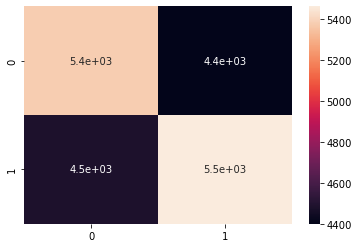

In [115]:
sn.heatmap(cc,annot=True)

In [117]:
model_report=classification_report(model_pred,y_test)
print(model_report)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      9780
           1       0.55      0.55      0.55      9947

    accuracy                           0.55     19727
   macro avg       0.55      0.55      0.55     19727
weighted avg       0.55      0.55      0.55     19727



In [118]:
import joblib

In [119]:
joblib.dump(model,'model1.h5')
joblib.dump(scaler,'scalerr.h5')
joblib.dump(pca,'pca.h5')

['pca.h5']

## app link

https://churn-tel.herokuapp.com/